In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

tf.random.set_seed(42)
np.random.seed(42)

In [2]:
initializer = tf.keras.initializers.HeNormal()
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(32, 32, 3)))

for i in range(20):
    model.add(keras.layers.Dense(100, activation='elu', kernel_initializer=initializer))

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

In [4]:
model.add(keras.layers.Dense(10, activation='softmax'))

In [5]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
model_checkpoint_cb = keras.callbacks.ModelCheckpoint("my_cifar10_model.h5", save_best_only=True)
callbacks = [early_stopping_cb, model_checkpoint_cb]

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=5000)

In [7]:
optimizer = tf.keras.optimizers.Nadam(learning_rate=5e-5)
model.compile(optimizer=optimizer,
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])

In [8]:
history = model.fit(X_train, y_train, batch_size=32,
          validation_data=(X_valid, y_valid),
          epochs=100,
          callbacks=callbacks)

Epoch 1/100
1407/1407 [==============================] - 15s 11ms/step - loss: 4.2153 - accuracy: 0.1690 - val_loss: 2.1481 - val_accuracy: 0.2116
Epoch 2/100
1407/1407 [==============================] - 14s 10ms/step - loss: 2.0588 - accuracy: 0.2463 - val_loss: 2.0555 - val_accuracy: 0.2542
Epoch 3/100
1407/1407 [==============================] - 14s 10ms/step - loss: 1.9507 - accuracy: 0.2853 - val_loss: 1.9477 - val_accuracy: 0.2844
Epoch 4/100
1407/1407 [==============================] - 14s 10ms/step - loss: 1.8781 - accuracy: 0.3100 - val_loss: 1.8992 - val_accuracy: 0.3030
Epoch 5/100
1407/1407 [==============================] - 13s 9ms/step - loss: 1.8145 - accuracy: 0.3363 - val_loss: 1.8506 - val_accuracy: 0.3294
Epoch 6/100
1407/1407 [==============================] - 14s 10ms/step - loss: 1.7614 - accuracy: 0.3578 - val_loss: 1.8167 - val_accuracy: 0.3398
Epoch 7/100
1407/1407 [==============================] - 14s 10ms/step - loss: 1.7146 - accuracy: 0.3753 - val_loss: 1.

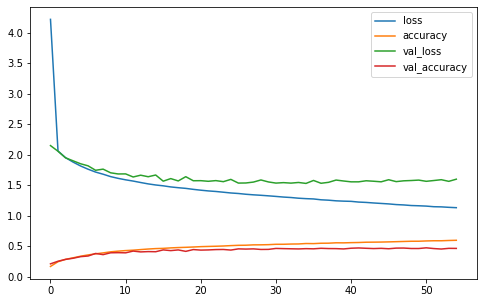

In [9]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()

In [10]:
model_loaded = keras.models.load_model("my_cifar10_model.h5")
model_loaded.evaluate(X_valid, y_valid)

157/157 [==============================] - 0s 2ms/step - loss: 1.5287 - accuracy: 0.0992


[1.5286898612976074, 0.09920000284910202]

In [11]:
model.evaluate(X_valid, y_valid)

157/157 [==============================] - 0s 2ms/step - loss: 1.5980 - accuracy: 0.4642


[1.5979927778244019, 0.4641999900341034]

In [12]:
model_bn = keras.Sequential()
model_bn.add(keras.layers.Flatten(input_shape=(32, 32, 3)))
model_bn.add(keras.layers.BatchNormalization())
initializer = tf.keras.initializers.HeNormal()

for i in range(20):
    model_bn.add(keras.layers.Dense(100, kernel_initializer=initializer))
    model_bn.add(keras.layers.BatchNormalization())
    model_bn.add(keras.layers.Activation('elu'))
    
model_bn.add(keras.layers.Dense(10, activation='softmax'))

In [13]:
es = keras.callbacks.EarlyStopping(patience=10)
cp = keras.callbacks.ModelCheckpoint("my_cifar10_model_bn.h5", save_best_only=True)

optimizer = tf.keras.optimizers.Nadam(learning_rate=5e-4)
model_bn.compile(optimizer=optimizer,
    loss="sparse_categorical_crossentropy",
    metrics=['accuracy'])

history = model_bn.fit(X_train, y_train, batch_size=32,
          validation_data=(X_valid, y_valid),
          epochs=100,
          callbacks=[es, cp])

Epoch 1/100
1407/1407 [==============================] - 24s 17ms/step - loss: 1.8291 - accuracy: 0.3480 - val_loss: 1.6771 - val_accuracy: 0.3938
Epoch 2/100
1407/1407 [==============================] - 23s 16ms/step - loss: 1.6581 - accuracy: 0.4080 - val_loss: 1.5768 - val_accuracy: 0.4276
Epoch 3/100
1407/1407 [==============================] - 22s 16ms/step - loss: 1.5946 - accuracy: 0.4333 - val_loss: 1.5622 - val_accuracy: 0.4462
Epoch 4/100
1407/1407 [==============================] - 22s 16ms/step - loss: 1.5432 - accuracy: 0.4528 - val_loss: 1.4871 - val_accuracy: 0.4664
Epoch 5/100
1407/1407 [==============================] - 23s 17ms/step - loss: 1.5008 - accuracy: 0.4659 - val_loss: 1.4621 - val_accuracy: 0.4812
Epoch 6/100
1407/1407 [==============================] - 22s 16ms/step - loss: 1.4654 - accuracy: 0.4793 - val_loss: 1.4553 - val_accuracy: 0.4852
Epoch 7/100
1407/1407 [==============================] - 22s 16ms/step - loss: 1.4251 - accuracy: 0.4920 - val_loss: 1

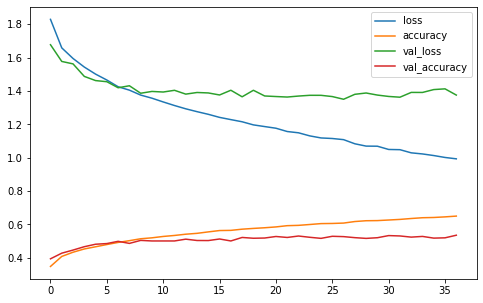

In [14]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()

In [24]:
model_loaded = keras.models.load_model("my_cifar10_model_bn.h5")
model_loaded.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.3265 - accuracy: 0.1139


[1.3265002965927124, 0.11389999836683273]

In [23]:
model_bn.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.3661 - accuracy: 0.5427


[1.3660839796066284, 0.5426999926567078]

In [17]:
model_selu = keras.Sequential()
model_selu.add(keras.layers.Flatten(input_shape=(32, 32, 3)))
initializer = tf.keras.initializers.LecunNormal()
for i in range(20):
    model_selu.add(keras.layers.Dense(100, activation = 'selu', kernel_initializer=initializer))

model_selu.add(keras.layers.Dense(10, activation='softmax'))

In [39]:
import math

def step_decay(epoch, lr):
    # initial_lrate = 1.0 # no longer needed
    drop = 0.5
    epochs_drop = 2.0
    lrate = lr * math.pow(drop,math.floor((1+epoch)/epochs_drop))
    return lrate

my_callbacks = [
    keras.callbacks.EarlyStopping(patience=10),
    keras.callbacks.ModelCheckpoint("my_cifar10_model_selu.h5", save_best_only=True),
]

optimizer = tf.keras.optimizers.Nadam(learning_rate=1e-5)
model_selu.compile(optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

history = model_selu.fit(X_train, y_train, batch_size=32,
          validation_data=(X_valid, y_valid),
          epochs=100,
          callbacks=my_callbacks)

Epoch 1/100
1407/1407 [==============================] - 15s 11ms/step - loss: 1.9271 - accuracy: 0.3010 - val_loss: 1.8518 - val_accuracy: 0.3254
Epoch 2/100
1407/1407 [==============================] - 18s 13ms/step - loss: 1.8232 - accuracy: 0.3412 - val_loss: 1.7867 - val_accuracy: 0.3440
Epoch 3/100
1407/1407 [==============================] - 16s 12ms/step - loss: 1.7576 - accuracy: 0.3665 - val_loss: 1.7342 - val_accuracy: 0.3664
Epoch 4/100
1407/1407 [==============================] - 15s 11ms/step - loss: 1.7113 - accuracy: 0.3807 - val_loss: 1.7273 - val_accuracy: 0.3764
Epoch 5/100
1407/1407 [==============================] - 15s 11ms/step - loss: 1.6713 - accuracy: 0.3967 - val_loss: 1.6682 - val_accuracy: 0.3984
Epoch 6/100
1407/1407 [==============================] - 14s 10ms/step - loss: 1.6421 - accuracy: 0.4076 - val_loss: 1.6566 - val_accuracy: 0.4038
Epoch 7/100
1407/1407 [==============================] - 14s 10ms/step - loss: 1.6131 - accuracy: 0.4186 - val_loss: 1

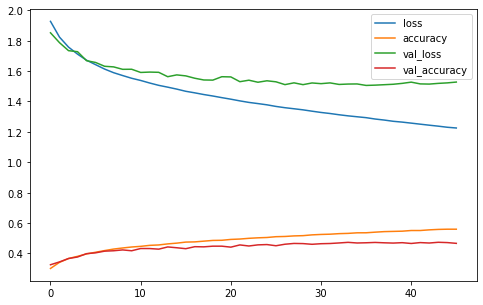

In [41]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()

In [42]:
model_loaded = keras.models.load_model("my_cifar10_model_selu.h5")
model_loaded.evaluate(X_valid, y_valid)

157/157 [==============================] - 0s 3ms/step - loss: 1.5055 - accuracy: 0.0992


[1.5054540634155273, 0.09920000284910202]

In [43]:
model_selu.evaluate(X_valid, y_valid)

157/157 [==============================] - 0s 3ms/step - loss: 1.5275 - accuracy: 0.4662


[1.5275484323501587, 0.46619999408721924]

In [101]:
model_alphadropout = keras.Sequential()
model_alphadropout.add(keras.layers.Flatten(input_shape=(32, 32, 3)))
initializer = tf.keras.initializers.LecunNormal()
for i in range(20):
    model_alphadropout.add(keras.layers.Dense(100, activation = 'selu', kernel_initializer=initializer))
    
model_alphadropout.add(keras.layers.AlphaDropout(rate=0.2))    
model_alphadropout.add(keras.layers.Dense(10, activation='softmax'))

In [102]:
X_train_scaled = X_train/255
X_valid_scaled = X_valid/255
X_test_scaled = X_test/255

In [105]:
my_callbacks = [
    keras.callbacks.EarlyStopping(patience=10),
    keras.callbacks.ModelCheckpoint("my_cifar10_model_alphadropout.h5", save_best_only=True),
]

optimizer = tf.keras.optimizers.Nadam(learning_rate=5e-4)
model_alphadropout.compile(optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

history = model_alphadropout.fit(X_train_scaled, y_train, batch_size=32,
          validation_data=(X_valid_scaled, y_valid),
          epochs=100,
          callbacks=my_callbacks)

Epoch 1/100
1407/1407 [==============================] - 17s 12ms/step - loss: 2.0786 - accuracy: 0.2303 - val_loss: 1.9641 - val_accuracy: 0.2858
Epoch 2/100
1407/1407 [==============================] - 17s 12ms/step - loss: 1.8833 - accuracy: 0.3167 - val_loss: 1.9998 - val_accuracy: 0.3216
Epoch 3/100
1407/1407 [==============================] - 17s 12ms/step - loss: 1.8006 - accuracy: 0.3531 - val_loss: 1.9033 - val_accuracy: 0.3418
Epoch 4/100
1407/1407 [==============================] - 17s 12ms/step - loss: 1.7395 - accuracy: 0.3735 - val_loss: 1.7977 - val_accuracy: 0.3696
Epoch 5/100
1407/1407 [==============================] - 17s 12ms/step - loss: 1.6883 - accuracy: 0.3986 - val_loss: 1.9865 - val_accuracy: 0.3018
Epoch 6/100
1407/1407 [==============================] - 18s 12ms/step - loss: 1.6526 - accuracy: 0.4135 - val_loss: 1.7186 - val_accuracy: 0.4094
Epoch 7/100
1407/1407 [==============================] - 19s 13ms/step - loss: 1.6170 - accuracy: 0.4260 - val_loss: 1

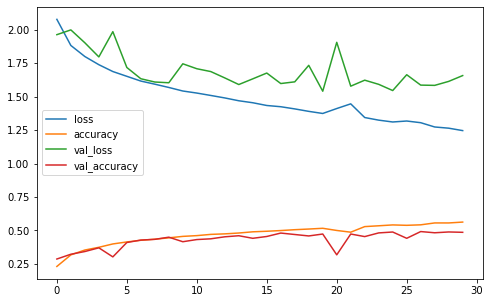

In [106]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()

In [107]:
model_loaded = keras.models.load_model("my_cifar10_model_alphadropout.h5")
model_loaded.evaluate(X_valid_scaled, y_valid)

157/157 [==============================] - 1s 3ms/step - loss: 1.5411 - accuracy: 0.1074


[1.5411227941513062, 0.10740000009536743]

In [108]:
model_alphadropout.evaluate(X_valid_scaled, y_valid)

157/157 [==============================] - 0s 3ms/step - loss: 1.6581 - accuracy: 0.4856


[1.65809965133667, 0.48559999465942383]

In [110]:
class MonteCarloDropout(keras.layers.Dropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

In [168]:
mc_model = keras.models.Sequential([
    MCAlphaDropout(layer.rate) if isinstance(layer, keras.layers.AlphaDropout) else layer
    for layer in model.layers
])

In [169]:
def mc_dropout_predict_probas(mc_model, X, n_samples=10):
    Y_probas = [mc_model.predict(X) for sample in range(n_samples)]
    return np.mean(Y_probas, axis=0)

def mc_dropout_predict_classes(mc_model, X, n_samples=10):
    Y_probas = mc_dropout_predict_probas(mc_model, X, n_samples)
    return np.argmax(Y_probas, axis=1)

In [170]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

y_pred = mc_dropout_predict_classes(mc_model, X_valid_scaled)
accuracy = np.mean(y_pred == y_valid[:, 0])
accuracy

0.0994

In [177]:
K = keras.backend
class OneCycleScheduler(keras.callbacks.Callback):
    def __init__(self, iterations, max_rate, start_rate=None,
                 last_iterations=None, last_rate=None):
        self.iterations = iterations
        self.max_rate = max_rate
        self.start_rate = start_rate or max_rate / 10
        self.last_iterations = last_iterations or iterations // 10 + 1
        self.half_iteration = (iterations - self.last_iterations) // 2
        self.last_rate = last_rate or self.start_rate / 1000
        self.iteration = 0
    def _interpolate(self, iter1, iter2, rate1, rate2):
        return ((rate2 - rate1) * (self.iteration - iter1)
                / (iter2 - iter1) + rate1)
    def on_batch_begin(self, batch, logs):
        if self.iteration < self.half_iteration:
            rate = self._interpolate(0, self.half_iteration, self.start_rate, self.max_rate)
        elif self.iteration < 2 * self.half_iteration:
            rate = self._interpolate(self.half_iteration, 2 * self.half_iteration,
                                     self.max_rate, self.start_rate)
        else:
            rate = self._interpolate(2 * self.half_iteration, self.iterations,
                                     self.start_rate, self.last_rate)
        self.iteration += 1
        K.set_value(self.model.optimizer.lr, rate)

In [182]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(keras.layers.Dense(100,
                                 kernel_initializer="lecun_normal",
                                 activation="selu"))

model.add(keras.layers.AlphaDropout(rate=0.1))
model.add(keras.layers.Dense(10, activation="softmax"))

optimizer = keras.optimizers.SGD(learning_rate=1e-2)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

In [183]:
n_epochs = 15
batch_size = 128
onecycle = OneCycleScheduler(math.ceil(len(X_train_scaled) / batch_size) * n_epochs, max_rate=0.05)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs, batch_size=batch_size,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[onecycle])

Epoch 1/15
352/352 [==============================] - 6s 18ms/step - loss: 2.2082 - accuracy: 0.2056 - val_loss: 2.0389 - val_accuracy: 0.3088
Epoch 2/15
352/352 [==============================] - 6s 17ms/step - loss: 1.9719 - accuracy: 0.2866 - val_loss: 1.8868 - val_accuracy: 0.3116
Epoch 3/15
352/352 [==============================] - 6s 17ms/step - loss: 1.8982 - accuracy: 0.3192 - val_loss: 1.9676 - val_accuracy: 0.2912
Epoch 4/15
352/352 [==============================] - 6s 17ms/step - loss: 1.8406 - accuracy: 0.3378 - val_loss: 1.7685 - val_accuracy: 0.3612
Epoch 5/15
352/352 [==============================] - 6s 17ms/step - loss: 1.8139 - accuracy: 0.3478 - val_loss: 1.9073 - val_accuracy: 0.3448
Epoch 6/15
352/352 [==============================] - 6s 17ms/step - loss: 1.7902 - accuracy: 0.3561 - val_loss: 2.1498 - val_accuracy: 0.2818
Epoch 7/15
352/352 [==============================] - 6s 18ms/step - loss: 1.7705 - accuracy: 0.3657 - val_loss: 1.7182 - val_accuracy: 0.3788